# Clusterização básica com machine learning em dataset de vinhos

O presente projeto tem como objetivo aplicar algoritmos de machine learning, mais especificamente Clusterização, em um dataset de vinhos, classificando-os em grupos heterogêneos de acordo com algumas características das composições químicas de cada amostra.

## Bibliotecas utilizadas

Para desenvolver este projeto, foi necessário importar as seguintes bibliotecas do Python,

In [11]:
# lib para carregamento do dataset
from sklearn import datasets

# libs de manipulação e exploração dos dados
import numpy as np
import pandas as pd

# lib de visualização dos dados
import matplotlib.pyplot as plt

# pré-processamento dos dados
from sklearn.preprocessing import scale

# modelos de cluster
from sklearn.cluster import KMeans

# métricas
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer

## Importando o dataset

Importadas as bibliotecas, agora importou-se o dataset para o desenvolvimento do modelo, cujo se encontra na biblioteca sklearn, conforme demonstrado a seguir,

In [3]:
df_wines,_ = datasets.load_wine(as_frame = True, return_X_y = True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Análise Exploratória e Descritiva dos Dados

Primeiro, foi feita uma breve análise exploratória e descritiva dos dados. Exibindo-se mais informações a respeito do dataset,

In [4]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Primeira observação importante: todas as colunas apresentam dados exclusivamente numéricos. Isto é crucial pois o modelo KMeans que será testado posteriormente tem como exigência que os dados de entrada sejam todos numéricos.

Segunda observação importante: não tem-se nenhum dado nulo em nenhuma coluna, visto que a quantidade de dados não nulos em cada uma delas é igual a quantidade total de entradas por coluna (178). Isto pode também ser verificado pelo código abaixo.

In [6]:
df_wines.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Conforme esperado, não existem dados nulos em nenhuma das colunas.

Verificando agora a existência de linhas duplicadas,

In [7]:
df_wines.duplicated().sum()

0

Portanto, não temos dados duplicados.

Avaliou-se agora a existência de outliers. Para tal foi plotado um gráfico do tipo Box, mostrando os valores mínimo, máximo, mediana, primeiro e terceiro quartis.

<Axes: >

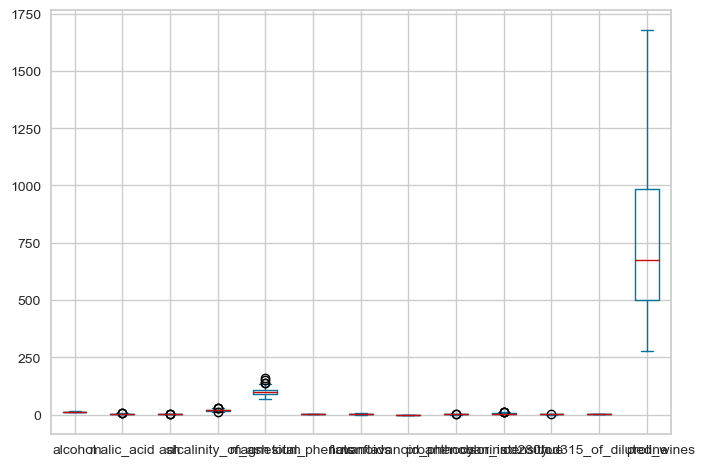

In [9]:
df_wines.plot.box()

Para melhorar a visualização da legenda (visto que os nomes estão sobrepostos) utilizou-se da função xticks() da biblioteca do Matplotlib, permitindo rotacionar cada um dos nomes em um ângulo pré-definido, no sentido também a ser escolhido. Neste exemplo rotacionou-se os nomes em 60 graus para a direita, conforme demonstrado abaixo,

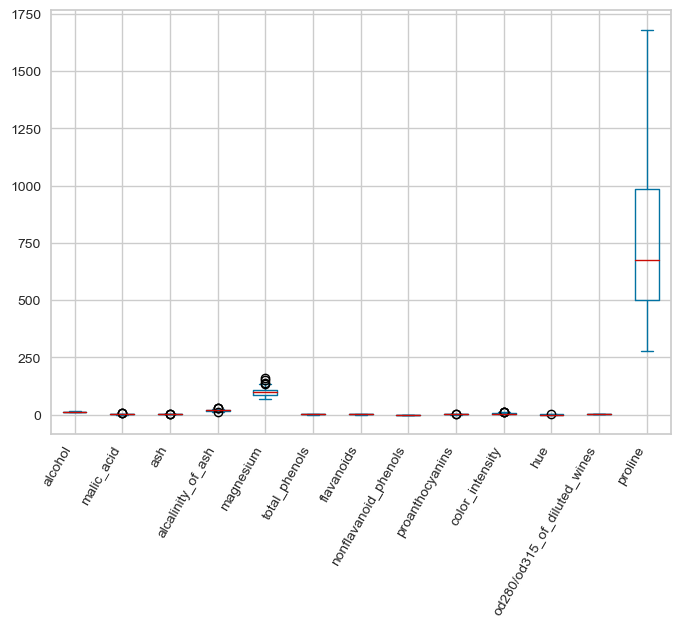

In [10]:
df_wines.plot.box()
plt.xticks(rotation = 60, ha = 'right');

Pelo resultado acima, corrigiu-se a legenda mas os dados continuam na sua maior parte "comprimidos". Isto acontece pois temos colunas com escalas numéricas muito diferentes. Este também é um problema ao rodar o modelo de KMenas, visto que para o seu correto funcionamento, os dados numéricos precisam estar na mesma escala. Assim, para corrigir isso aplicou-se a função scale() da biblioteca scikit-learn importada anteriormente. Esta função irá transformar os dados de todas as colunas de tal modo a convertê-los para valores onde a média seja igual a zero e desvio padrão igual a 1. Este processo é demonstrado a seguir,

In [12]:
# criando o dataframe escalonado.
df_wines_scaled = df_wines.apply(scale)

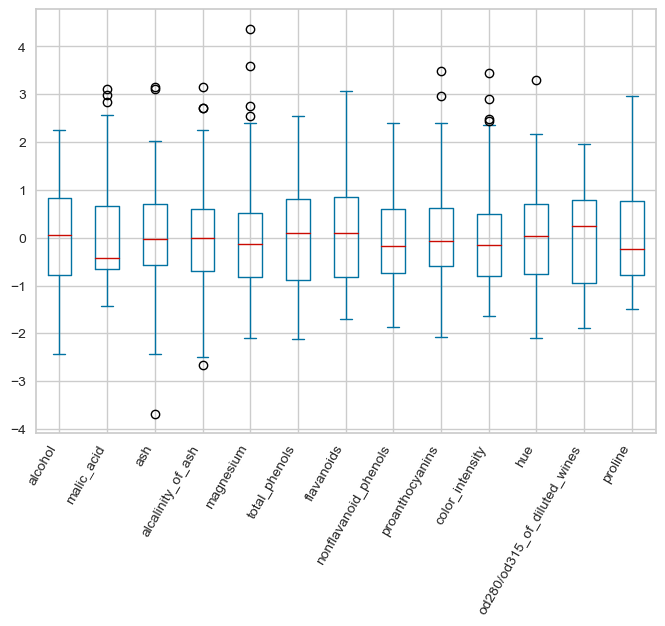

In [15]:
# plotando o gráfico Box utilizando o dataframe escalonado
df_wines_scaled.plot.box()
plt.xticks(rotation = 60, ha = 'right');

Com o resultado acima, fica agora evidente a presença de outliers no dataset, representados pelos círculos no gráfico. Para identificá-los de forma mais exata, utilizou-se do padrão Z-score, onde |Z-score| > 3.

- A função .abs() pelo somente o valor absoluto de todos os dados (como se fosse o valor em módulo, desconsiderando o sinal)
- E a função .gt(3) faz um comparativo se o valor do dado em questão é maior que 3 (funciona da mesma forma que a simbologia > 3)
caso fosse escrito .gt(5) iria comparar se o valor é maior que 5, e assim por diante.

Na execução abaixo, como as duas funções estão em cadeia (uma seguida da outra), o resultado final então irá retornar True para todas as linhas (por conta da utilização da função .any(axis = 1)) em que apresenta dados com valor absoluto maiores que 3. Feito isto, será somada a quantidade de "True" retornados (utilizando a função .sum()).

In [18]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

10

Portanto, existem 10 linhas com dados outliers. Exibindo-as a seguir,

In [19]:
df_wines_scaled[outlier_rows]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,0.061000,-0.257044,3.119772,1.653086,1.703265,0.536601,0.653312,0.871420,0.576613,-0.639377,0.757038,0.830961,0.264653
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
69,-0.976623,-1.029035,-2.253579,-0.809251,3.599025,-0.713218,-0.752242,-1.787656,1.592822,-0.955153,1.415139,0.647343,-0.092010
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249
95,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394
110,-1.903071,1.260006,-1.997705,0.001518,0.509638,1.417883,0.552915,-0.981875,3.485073,-0.933525,-0.910151,0.280108,-0.588791
115,-2.434235,-0.741782,-0.608676,0.602088,-1.035055,0.264205,0.141289,1.274310,0.734300,-1.366095,3.301694,0.364855,-1.082388
121,-1.779545,-0.257044,3.156325,2.704083,1.352198,1.417883,3.062832,0.871420,0.489009,0.407442,-0.120430,1.523058,-0.897687
123,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711


Neste caso, adotou-se a estratégia de excluir tais linhas da análise, visto que são poucos casos de outliers. Para excluir estas linhas, basta aplicar um filtro no dataset padronizado, desconsiderando todas estas linhas. Isto é demonstrado abaixo:

In [20]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

## Modelling

Feito o tratamento dos dados numéricos e excluídos os outliers, agora é possível partir para a parte de desenvolvimento do modelo.

### Determinando o valor de K

Como não se sabe ao certo a quantidade de clusters em que se deseja dividir o dataset, é possível utilizar o chamado "Método do Cotovelo", no qual, utilizando a função kelbow_visualizer, da biblioteca yellowbrick importada anteriormente, temos um gráfico da variância em função do número de clusters. Com isto, é possível definir o ponto ótimo.

Desta forma, utilizando a linha de código abaixo, plotou-se o gráfico do "cotovelo" (o teste foi realizado com valores de K variando de 2 até 10).

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

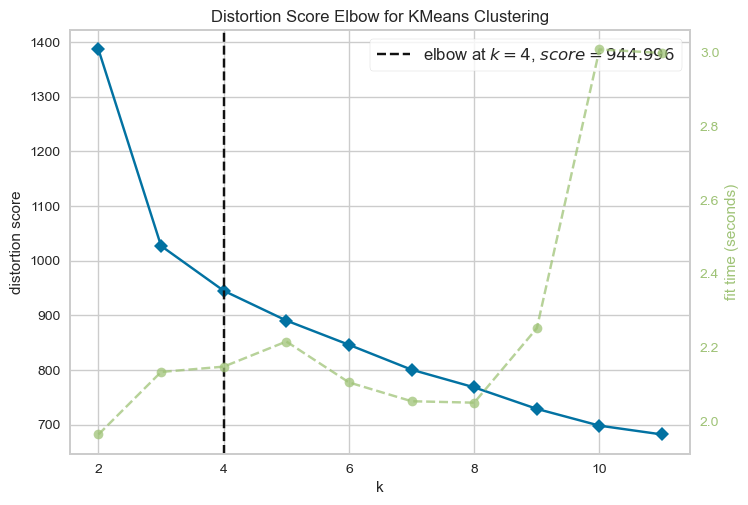

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11, n_init=10), k=11)

In [25]:
kelbow_visualizer(KMeans(n_init=10), df_wines_scaled, k = 11)

Analisando o gráfico acima, temos que o ponto ótimo se da com um valor de K = 4. Para valores maiores que 4, o score de variância dos dados diminui de forma não abrupta, se comparado a valores de K menores que 4.

Outro fator importante é a interpretabilidade dos clusters. Quanto maior o valor de K, mais clusters, ou seja, em mais grupos serão divididos os dados. Avaliando do ponto de vista de negócio, isto pode ser ruim pois muitos grupos dificultam a própria interpretação das diferenças entre eles.

### Clusterizando

Escolhido o valor de K, agora temos o modelo definido abaixo,

In [26]:
model = KMeans(n_clusters = 4, n_init = 10)

Treinando o modelo com o dataset escalonado sem outliers,

In [27]:
model.fit(df_wines_scaled)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10)

Salvando os resultados dos centroides e clusters,

In [28]:
centroids = model.cluster_centers_
labels = model.labels_

### Interpretando os clusters

Para visualizar e interpretar os resultados, primeiro definiu-se um Data Frame com as respectivas coordenadas dos centróides.

OBS: os centróides estão 

In [34]:
centroids_df = pd.DataFrame(centroids, columns = df_wines.columns).T
centroids_df

,0,1,2,3
alcohol,0.172174,-0.729245,0.968807,-0.960741
malic_acid,0.976956,-0.407049,-0.346647,-0.367649
ash,0.242941,-0.771242,0.331744,0.046675
alcalinity_of_ash,0.586116,-0.121757,-0.785228,0.483047
magnesium,-0.028166,-0.562039,0.476447,-0.531024
total_phenols,-1.037775,0.300468,0.909507,-0.655419
flavanoids,-1.242477,0.345781,0.980605,-0.424160
nonflavanoid_phenols,0.677690,-0.517491,-0.605356,0.793720
proanthocyanins,-0.810143,0.270920,0.577569,-0.539089
color_intensity,0.953861,-0.801022,0.252110,-0.857053
